In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('/content/Data.csv', sep=',')

In [3]:
data.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Timestamp,31104.0,1.572253e+12,8.979096e+09,1.556701e+12,1.564477e+12,1.572253e+12,1.580028e+12,1.587804e+12
Current,31104.0,-3.858025e-03,3.317085e+01,-3.000000e+02,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01
Total voltage,31104.0,6.427220e+01,1.918436e+00,4.816035e+01,6.370021e+01,6.529974e+01,6.534454e+01,6.672000e+01
SOC,31104.0,8.289451e-01,1.340328e-01,-1.557136e-01,7.817417e-01,9.019145e-01,9.050290e-01,1.000000e+00
Temperature,31104.0,2.791573e+01,1.330807e+01,2.026328e+01,2.227295e+01,2.606085e+01,2.952342e+01,1.361182e+02
SOH,31104.0,9.482256e-01,1.963543e-02,9.193983e-01,9.320675e-01,9.451872e-01,9.631542e-01,1.000000e+00
Equivalent cycle,31104.0,5.256384e+01,3.130174e+01,0.000000e+00,2.443846e+01,5.249951e+01,7.724166e+01,1.078477e+02
Application status,31104.0,9.999678e-01,5.670115e-03,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Grid status,31104.0,9.881366e-01,1.082731e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Grid power,31104.0,2.214946e+02,2.991291e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.174105e+02,6.540143e+02


## Grid Status and SOC

In [5]:
print('Unique Values in Grid Status: {}'.format(data['Grid status'].nunique()))
print('Unique Values in SOC: {}'.format(data['SOC'].nunique()))

Unique Values in Grid Status: 2
Unique Values in SOC: 11395


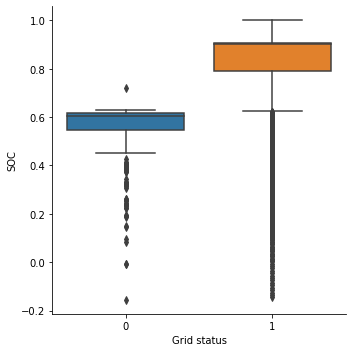

In [6]:
sns.catplot(x='Grid status', y='SOC', kind = 'box', data=data)

In [0]:
grid_status_zero = data[(data['Grid status'] == 0)]
grid_status_one = data[(data['Grid status'] == 1)]

In [8]:
grid_status_zero.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
64,1556765215000,-300,63.310191,0.721685,125.973128,0.997131,0.139157,1,0,0.0,0.0,0.000000
72,1556773215000,-300,60.230197,0.508074,126.845802,0.996159,0.310971,1,0,0.0,0.0,1231.409779
136,1556837215000,-300,61.975956,0.628823,128.981402,0.994788,0.650383,1,0,0.0,0.0,8703.486782
200,1556901215000,-300,61.968977,0.628721,135.607505,0.993498,0.929710,1,0,0.0,0.0,13994.455210
240,1556941215000,-300,61.966028,0.628681,125.970567,0.992725,1.209373,1,0,0.0,0.0,19290.135370


In [9]:
grid_status_one.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


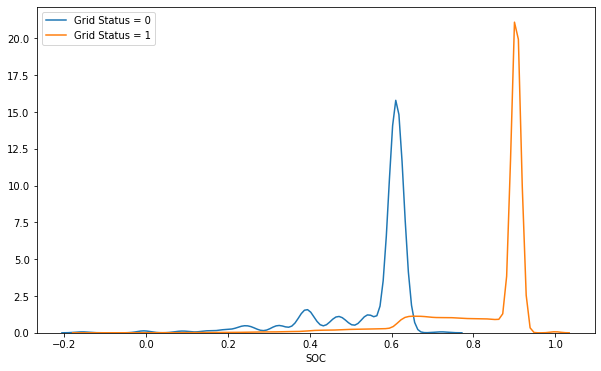

In [10]:
fig = plt.figure(figsize=(10,6));
sns.distplot(grid_status_zero.SOC, hist = False, label='Grid Status = 0');
sns.distplot(grid_status_one.SOC,  hist = False, label='Grid Status = 1');
plt.show()

Note : SOC values for Grid Status 0 lies behind 0.8 Units. Majority of data for Grid status 1 lies ahead of 0.7 units of SOC.  

## Equivalent Cycles and SOH

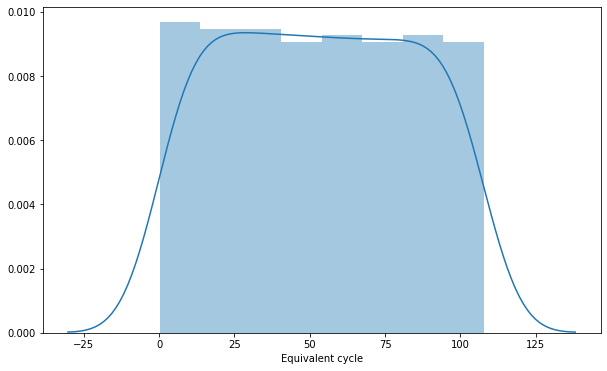

In [11]:
fig = plt.figure(figsize=(10,6));
sns.distplot(grid_status_zero['Equivalent cycle'], rug=False, hist = True);


In [12]:
print('Unique Values in Equivalent Cycle: {}'.format(data['Equivalent cycle'].nunique()))
print('Unique Values in SOH: {}'.format(data['SOH'].nunique()))

Unique Values in Equivalent Cycle: 11397
Unique Values in SOH: 31104


In [13]:
data['Equivalent cycle'].max()

107.8477185

In [0]:
x_ticks = [-25,0,25,50,75,100,125]

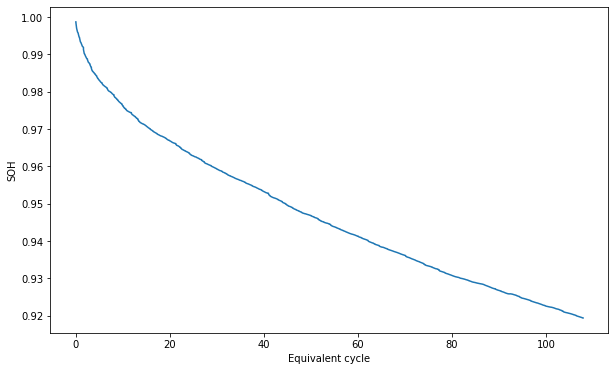

In [15]:
fig = plt.figure(figsize=(10,6));
ax = sns.lineplot(x='Equivalent cycle', y='SOH', data=data)


Note : SOH and Equivalent Cycle show an inverse relation. SOH value decreases as Equivalent Cycle value increases.

## Temperature and SOC

In [16]:
print('Unique Values in Temperature: {}'.format(data['Temperature'].nunique()))
print('Unique Values in SOC: {}'.format(data['SOC'].nunique()))

Unique Values in Temperature: 31104
Unique Values in SOC: 11395


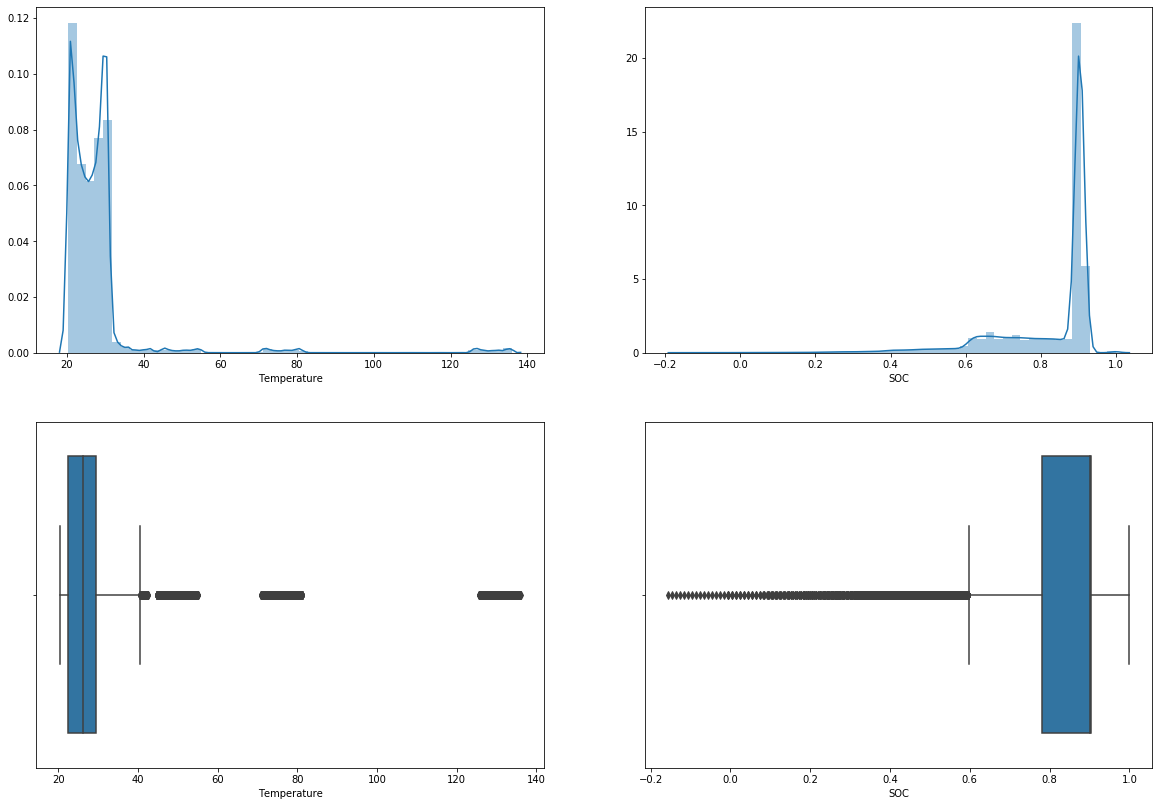

In [17]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20,14))

sns.distplot(data.Temperature, ax=axs[0,0]);
sns.distplot(data.SOC, ax=axs[0,1]);
sns.boxplot(x='Temperature', data=data, ax=axs[1,0])
sns.boxplot(x='SOC', data=data, ax=axs[1,1])

Note : Data for both the variables is highly skewed, with more than 80% of data of both parameteres lying on a particular side.

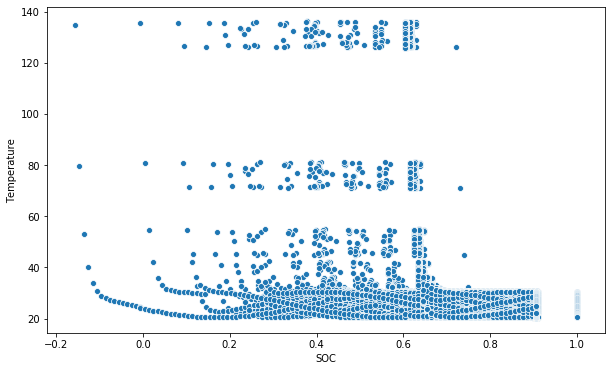

In [18]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='SOC', y='Temperature', data=data)

Note : Temperature does not increase beyond 35 units after 0.7 SOC.  

It would be quite interesting to see whether there is any particular reason for the data points showing higher temperatures (Between 120 and 140 units). Let us try to map Grid Status in the above graph.

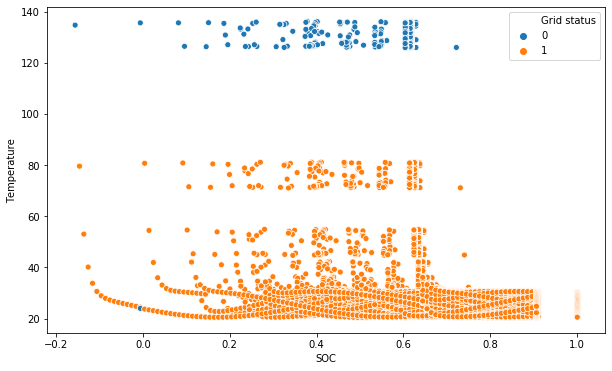

In [19]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='SOC', y='Temperature', hue='Grid status', data=data)

Note : For Grid Status 0, temperatures are particularly higher ( > 90 units). 